In [1]:
import numpy as np
import math
import os
import glob
import pandas as pd
from pylab import *
#from netCDF4 import Dataset

import re
from mpl_toolkits.basemap import Basemap,shiftgrid,cm
import numpy
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
file_source = open('updated_lon.dat')
line_content = file_source.readlines()

In [3]:
def context2array(context):
    return np.matrix([map(float, re.split('\s+', ln.strip()))
      for ln in context.splitlines() if ln.strip()])

In [4]:
lon_ice=np.empty([10,464])

In [5]:
for j in range(0, 464):
     lon_ice[:,j] = context2array(line_content[j])

In [6]:
shape = ( 80, 58 )
lon2_ice=lon_ice.reshape(shape)

In [7]:
file_source = open('updated_lat.dat')
line_content = file_source.readlines()
lat_ice=np.empty([10,464])
for j in range(0, 464):
     lat_ice[:,j] = context2array(line_content[j])
lat2_ice=lat_ice.reshape(shape)

In [8]:
file_source = open('ice_2.dat')
line_content = file_source.readlines()
ice=np.empty([80,58])
for j in range(1, 58):
     ice[:,j] = context2array(line_content[j])

In [9]:
print lon2_ice.shape
print lat2_ice.shape
print ice.shape

(80, 58)
(80, 58)
(80, 58)


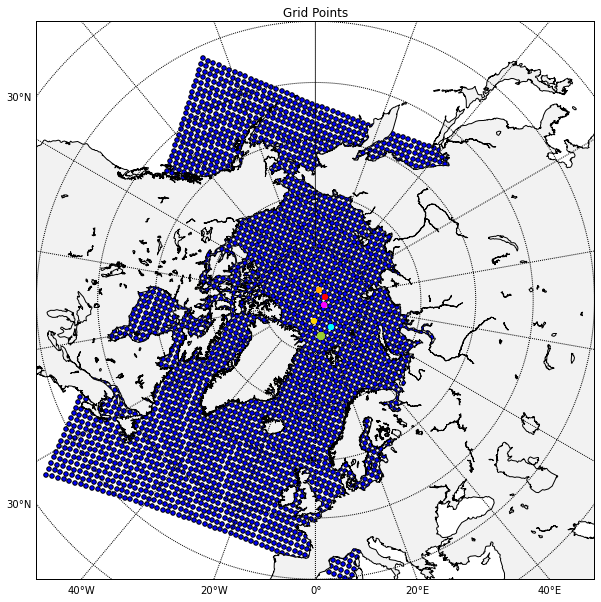

In [23]:
fig = plt.figure(figsize=(10,10))
m = Basemap(projection='npstere',boundinglat=40,lon_0=0,resolution='l')
m.drawcoastlines()

m.fillcontinents(color = '0.95')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])

x,y= m(lon2_ice,lat2_ice)
cs=m.scatter(x,y)
x7,y7 = m(lon.values,lat.values)
x2,y2 = m(lon2.values,lat2.values)
x3,y3 = m(lon3.values,lat3.values)
x4,y4 = m(lon4.values,lat4.values)
x5,y5 = m(lon5.values,lat5.values)
x6,y6 = m(lon6.values,lat6.values)
m.scatter(x7,y7,color='magenta',label='Stn1')
m.scatter(x2,y2,color='red',label='Stn2')
m.scatter(x3,y3,color='orange',label='Stn3')
m.scatter(x4,y4,color='gold',label='Stn4')
m.scatter(x5,y5,color='cyan',label='Stn5')
m.scatter(x6,y6,color='yellowgreen',s=45,label='Stn6')

plt.title("Grid Points")
plt.show()

Note:
The sizes of scatter are depended on the sea ice concentrations. 
Higher the concentrations, bigger the scatters


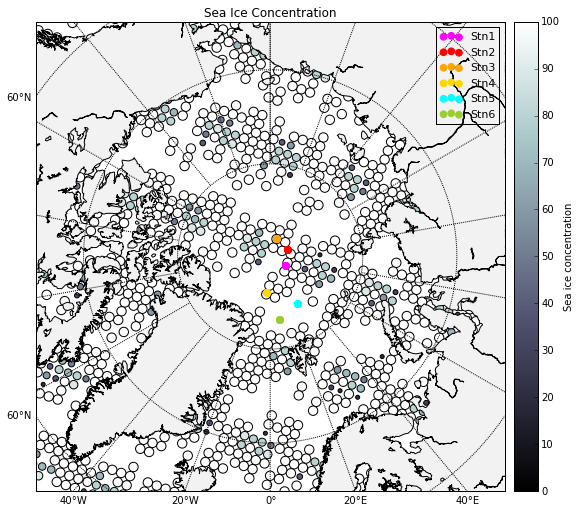

In [19]:
data=pd.read_csv('/ocean/xiaoxiny/research/findk/All_Arctic-data/60changed.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv')
data2=pd.read_csv('/ocean/xiaoxiny/research/findk/All_Arctic-data/60changed2.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv')
data3=pd.read_csv('/ocean/xiaoxiny/research/findk/All_Arctic-data/60changed3.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv')
data4=pd.read_csv('/ocean/xiaoxiny/research/findk/All_Arctic-data/60changed4.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv')
data5=pd.read_csv('/ocean/xiaoxiny/research/findk/All_Arctic-data/60changed5.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv')
data6=pd.read_csv('/ocean/xiaoxiny/research/findk/All_Arctic-data/60changed6.Th-Pa_data_July2012-Oceanic-U-Series-and-REE-Database.csv')

dep = data['depth'];th = data['230Th diss.'];pa = data['231Pa diss.'];lon = data['long.'];lat = data['lat.'];
dep2 = data2['depth'];th2 = data2['230Th diss.'];pa2 = data2['231Pa diss.'];lon2 = data2['long.'];lat2 = data2['lat.'];
dep3 = data3['depth'];th3 = data3['230Th diss.'];pa3 = data3['231Pa diss.'];lon3 = data3['long.'];lat3 = data3['lat.'];
dep4 = data4['depth'];th4 = data4['230Th diss.'];pa4 = data4['231Pa diss.']; lon4 = data4['long.'];lat4 = data4['lat.'];
dep5 = data5['depth'];th5 = data5['230Th diss.'];pa5 = data5['231Pa diss.']; lon5 = data5['long.'];lat5 = data5['lat.'];
dep6 = data6['depth'];th6 = data6['230Th diss.'];pa6 = data6['231Pa diss.']; lon6 = data6['long.'];lat6 = data6['lat.'];

fig = plt.figure(figsize=(9,9))
m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l')

x,y= m(lon_ice,lat_ice)
cm = plt.cm.get_cmap('bone')
cs=m.scatter(x,y,c=10*ice,cmap=cm,s=ice*8)
plt.clim(0,100)
cbar = m.colorbar(cs,location='right',pad="2%")
cbar.set_label('Sea ice concentration')

m.drawcoastlines()
m.fillcontinents(color = '0.95')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])

x,y = m(lon.values,lat.values)
x2,y2 = m(lon2.values,lat2.values)
x3,y3 = m(lon3.values,lat3.values)
x4,y4 = m(lon4.values,lat4.values)
x5,y5 = m(lon5.values,lat5.values)
x6,y6 = m(lon6.values,lat6.values)
m.scatter(x,y,color='magenta',s=45,label='Stn1')
m.scatter(x2,y2,color='red',s=45,label='Stn2')
m.scatter(x3,y3,color='orange',s=45,label='Stn3')
m.scatter(x4,y4,color='gold',s=45,label='Stn4')
m.scatter(x5,y5,color='cyan',s=45,label='Stn5')
m.scatter(x6,y6,color='yellowgreen',s=45,label='Stn6')
plt.legend(loc=1,fontsize=11)
plt.title("Sea Ice Concentration")

print ('Note:')
print ('The sizes of scatter are depended on the sea ice concentrations. ')
print ('Higher the concentrations, bigger the scatters')
plt.show()

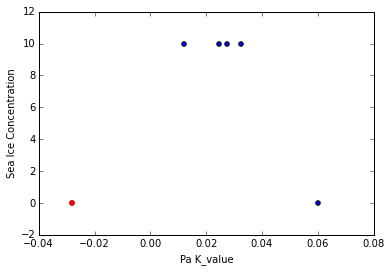

In [12]:
x = np.array([0.027325463991335147,0.024510694785748719,0.011888324873096453,0.032469161614049787,-0.028055099512585252,0.060141897395522552])
y = np.array([10, 10,10,10,0,0])
plt.scatter(x,y)
plt.scatter(x[4],y[4],color='red')
plt.xlabel('Pa K_value')
plt.ylabel('Sea Ice Concentration')

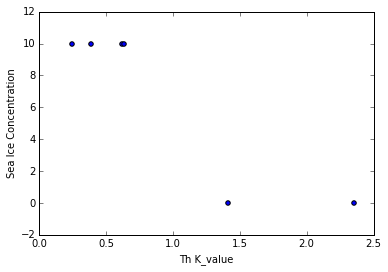

In [13]:
x = np.array([0.3869683922000281,0.62248306873686932,0.24594958014800608,0.63967047720844161,1.4097074531498022,2.349861489705912])
y = np.array([10, 10,10,10,0,0])
plt.scatter(x,y)
plt.xlabel('Th K_value')
plt.ylabel('Sea Ice Concentration')